In [2]:
### Loading Packages And Datasets

#기본적인 패키지

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#모델링

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

#모델평가

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
# 데이터 불러오기

data_df = pd.read_excel('data.2020.xlsx', index_col=0)

# 원본 데이터 남겨두기

data_df_copy = data_df.copy()

# 불필요한 parameter 제거

data_df = data_df.drop(['채수목적구분', '심도(m)', '채수일자 상반기'], axis=1)

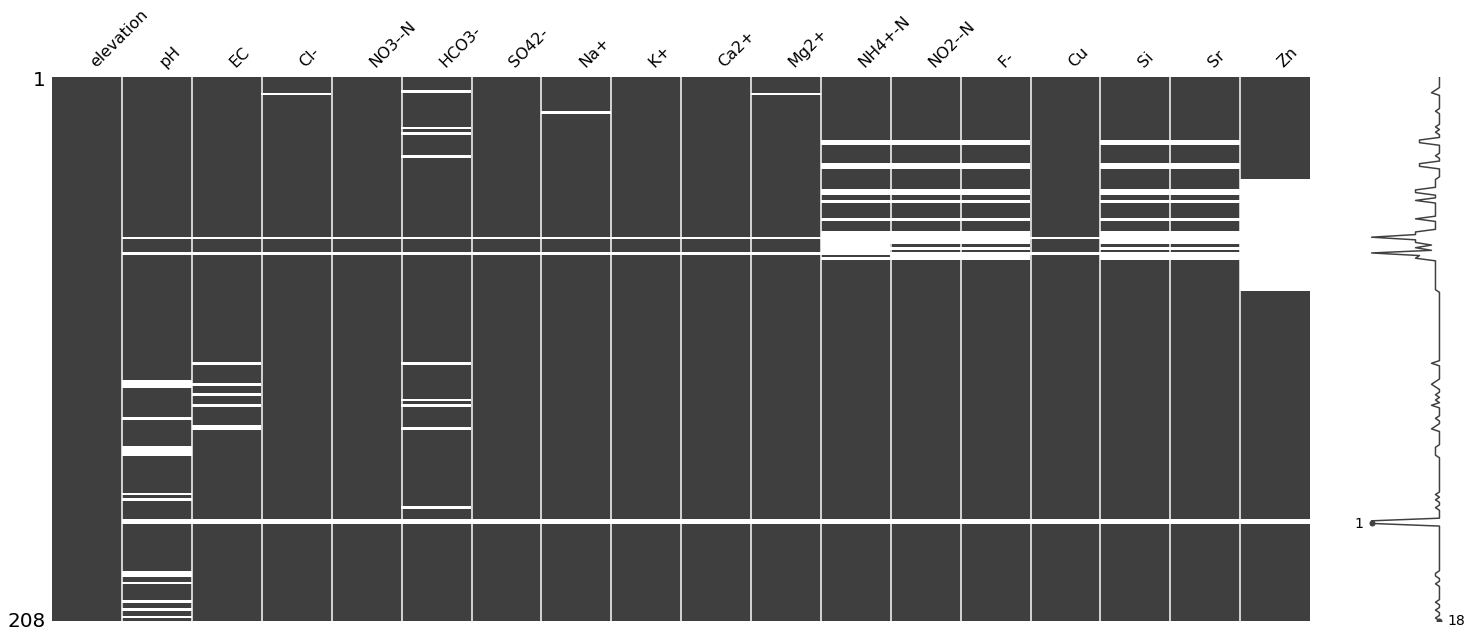

In [4]:
msno.matrix(data_df)
plt.show();

In [5]:
data_df.describe()

,elevation,pH,EC,Cl-,NO3--N,HCO3-,SO42-,Na+,K+,Ca2+,Mg2+,NH4+-N,NO2--N,F-,Cu,Si,Sr,Zn
count,208.000000,188.000000,198.000000,203.000000,204.000000,195.000000,204.000000,203.000000,204.000000,204.000000,203.000000,188.000000,189.000000,189.000000,204.000000,189.000000,189.000000,163.000000
mean,60.052212,7.871277,1034.397475,205.078325,5.811275,61.978974,32.562255,135.251724,48.682843,18.522549,13.979803,0.070048,0.001757,0.187561,0.001660,17.043915,0.213096,0.117585
std,74.114449,1.248668,3816.320036,844.275769,6.701292,49.468842,102.005712,541.466056,234.514343,37.898146,42.838318,0.600337,0.024149,0.260794,0.009896,4.727312,1.392602,1.409491
min,1.690000,6.200000,7.200000,4.600000,0.000000,0.000000,1.600000,0.000000,1.400000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.980000,7.200000,155.475000,10.850000,1.500000,39.300000,3.875000,10.100000,3.000000,6.675000,3.850000,0.000000,0.000000,0.088000,0.000000,15.400000,0.041400,0.000000
50%,42.960000,7.500000,259.550000,18.300000,3.650000,51.000000,8.450000,15.900000,4.300000,10.250000,6.100000,0.000000,0.000000,0.114000,0.000000,17.300000,0.070000,0.000000
75%,77.500000,8.100000,449.750000,32.050000,7.675000,68.800000,20.000000,24.950000,6.525000,16.500000,12.200000,0.000000,0.000000,0.164000,0.000000,19.500000,0.122600,0.006000
max,546.000000,12.700000,30770.000000,6987.700000,43.700000,609.500000,1014.600000,4478.700000,1927.100000,412.600000,477.800000,7.000000,0.332000,1.876000,0.090000,30.100000,19.100000,18.000000


In [6]:
data_df = data_df.fillna({'NH4+-N' : 0, 'NO2--N':0, 'Cu':0, 'Zn':0})
data_df['pH'] = data_df['pH'].fillna((data_df['pH'].mean()))
data_df['NO3--N'] = data_df['NO3--N'].fillna((data_df['NO3--N'].mean()))
data_df['HCO3-'] = data_df['HCO3-'].fillna((data_df['HCO3-'].mean()))
data_df['F-'] = data_df['F-'].fillna((data_df['F-'].mean()))
data_df['Si'] = data_df['Si'].fillna((data_df['Si'].mean()))
data_df['Sr'] = data_df['Sr'].fillna((data_df['Sr'].mean()))
data_df = data_df.dropna(subset=['EC', 'Cl-', 'SO42-', 'Na+', 'K+', 'Ca2+', 'Mg2+'])

In [7]:
parameter = ['elevation', 'pH', 'EC', 'Cl-', 'NO3--N', 'HCO3-', 'SO42-', 'Na+', 'K+', 'Ca2+', 'Mg2+', 'Si']
print('quantile 0.94 : ' + str(data_df[parameter].quantile(0.94)))
print('quantile 0.95 : ' + str(data_df[parameter].quantile(0.95)))
print('quantile 0.96 : ' + str(data_df[parameter].quantile(0.96)))
print('quantile 0.97 : ' + str(data_df[parameter].quantile(0.97)))
print('quantile 0.98 : ' + str(data_df[parameter].quantile(0.98)))
print('quantile 0.99 : ' + str(data_df[parameter].quantile(0.99)))

quantile 0.94 : elevation     119.351
pH              9.830
EC           1370.000
Cl-           257.700
NO3--N         16.230
HCO3-         120.800
SO42-          47.400
Na+           148.180
K+             33.010
Ca2+           35.960
Mg2+           23.020
Si             23.030
Name: 0.94, dtype: float64
quantile 0.95 : elevation     132.000
pH             10.000
EC           1795.500
Cl-           291.600
NO3--N         19.000
HCO3-         132.250
SO42-          53.450
Na+           208.525
K+             42.650
Ca2+           39.300
Mg2+           25.575
Si             23.425
Name: 0.95, dtype: float64
quantile 0.96 : elevation     170.044
pH             10.700
EC           2927.040
Cl-           589.700
NO3--N         20.520
HCO3-         134.360
SO42-          97.180
Na+           317.520
K+             67.860
Ca2+           41.940
Mg2+           28.180
Si             23.800
Name: 0.96, dtype: float64
quantile 0.97 : elevation     224.1435
pH             11.4450
EC           6782

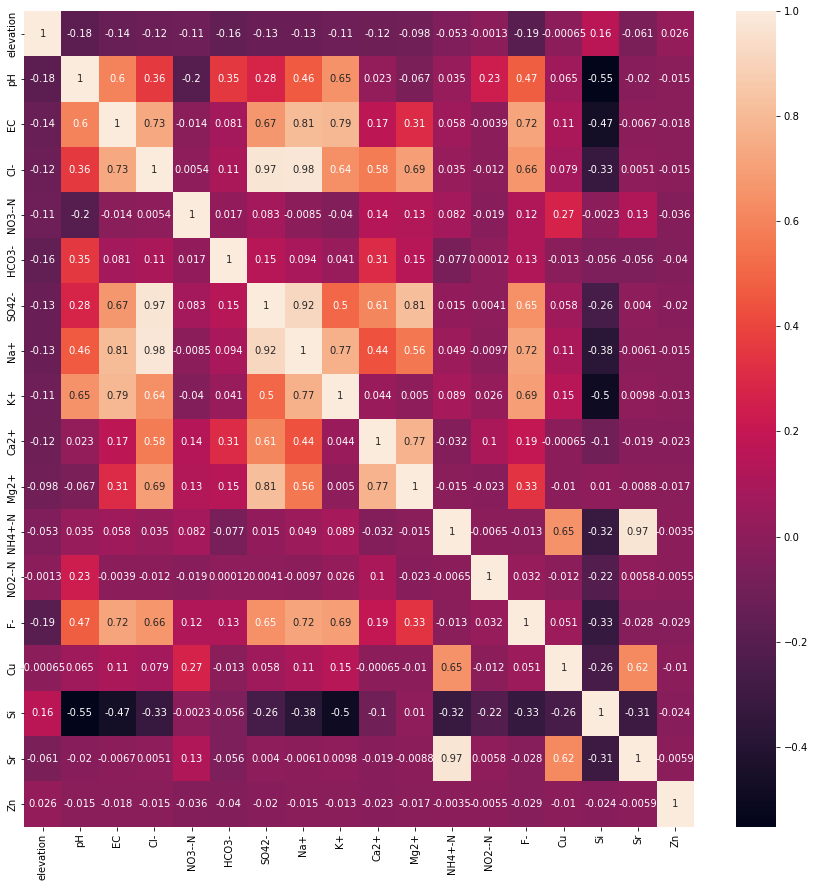

In [8]:
corr_df = data_df.corr(method='pearson')
plt.figure(figsize=(15, 15))
sns.heatmap(corr_df, annot=True)
plt.show()

In [9]:
corr_df.corr()['Cl-'].sort_values(ascending=False)

Cl-          1.000000
SO42-        0.990249
Na+          0.987412
EC           0.896883
F-           0.892560
K+           0.787194
Mg2+         0.774500
Ca2+         0.691696
pH           0.589091
HCO3-        0.185122
NO2--N      -0.102315
NO3--N      -0.151327
Cu          -0.160773
NH4+-N      -0.194933
Zn          -0.227454
Sr          -0.243467
elevation   -0.471587
Si          -0.562310
Name: Cl-, dtype: float64

In [11]:
data_df.drop(data_df[data_df['EC'] > 1795.500000].index, axis=0, inplace=True)
data_df.drop(data_df[data_df['Cl-'] > 291.600000].index, axis=0, inplace=True)
data_df.drop(data_df[data_df['SO42-'] > 53.450000].index, axis=0, inplace=True)
data_df.drop(data_df[data_df['Na+'] > 208.525000].index, axis=0, inplace=True)
data_df.drop(data_df[data_df['K+'] > 42.650000].index, axis=0, inplace=True)
data_df.drop(data_df[data_df['Ca2+'] > 39.300000].index, axis=0, inplace=True)
data_df.drop(data_df[data_df['Mg2+'] > 25.575000].index, axis=0, inplace=True)

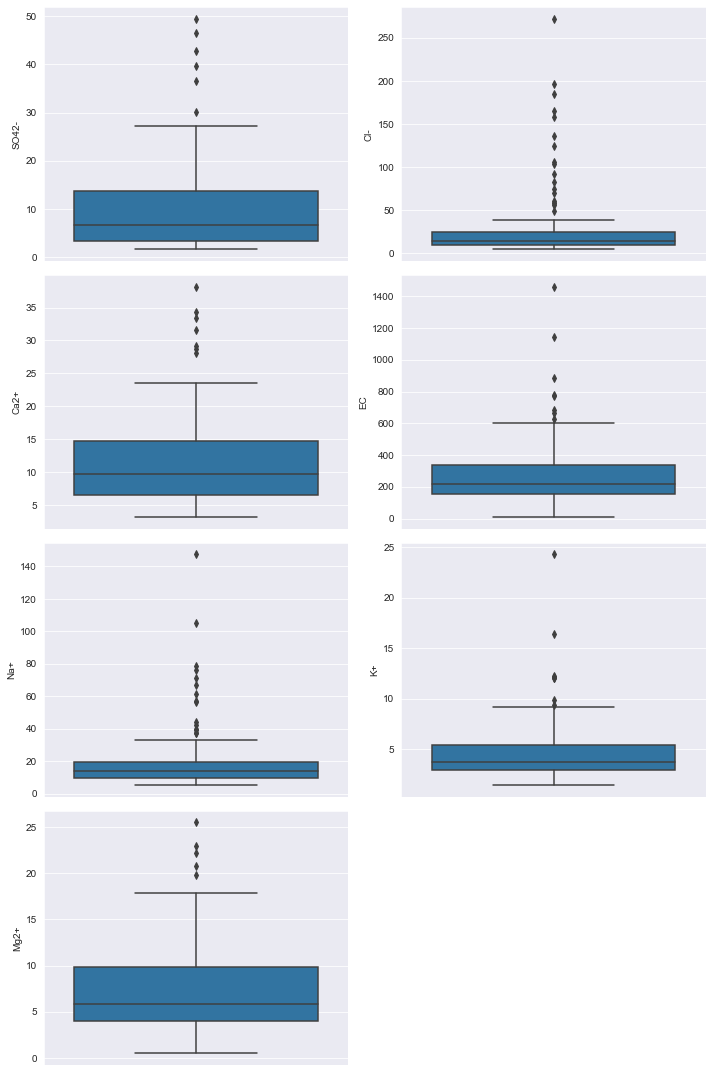

In [13]:
plt.figure(figsize=(10,15))

for i,col in enumerate(data_df[{'EC', 'Cl-', 'SO42-', 'Na+', 'K+', 'Ca2+', 'Mg2+'}]):    
    plt.subplot(4,2,i + 1)
    sns.boxplot(y=col, data=data_df)
    #plt.ylabel('')

plt.tight_layout()

plt.show()

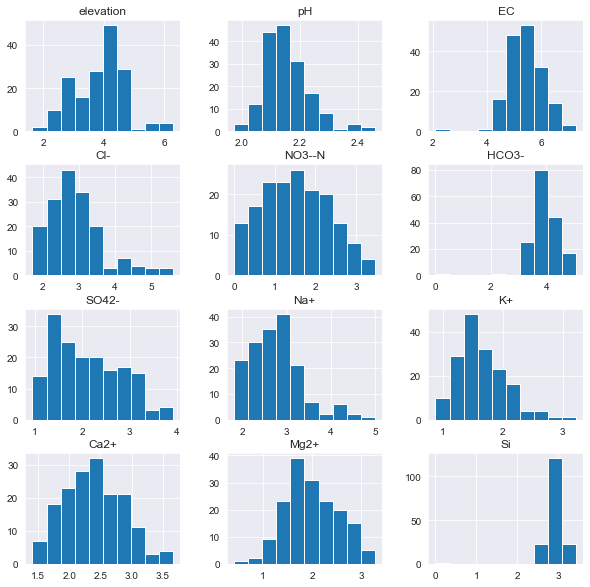

In [14]:
parameters = ['elevation', 'pH', 'EC', 'Cl-', 'NO3--N', 'HCO3-', 'SO42-', 'Na+', 'K+', 'Ca2+', 'Mg2+', 'Si']
data_df = np.log1p(data_df)
data_df[parameters].hist(figsize=(10,10));

In [15]:
data_df[parameters].describe()

,elevation,pH,EC,Cl-,NO3--N,HCO3-,SO42-,Na+,K+,Ca2+,Mg2+,Si
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,3.847430,2.156083,5.423634,2.905210,1.513641,3.943930,2.119534,2.757894,1.641536,2.396726,1.991287,2.912264
std,0.857182,0.078752,0.647479,0.767334,0.809779,0.535863,0.709954,0.591832,0.398298,0.483478,0.545858,0.274358
min,1.638997,1.974081,2.104134,1.722767,0.000000,0.000000,0.955511,1.808289,0.875469,1.410987,0.405465,0.000000
25%,3.113960,2.113225,5.033033,2.388763,0.906085,3.656455,1.481605,2.388763,1.360977,2.024837,1.604387,2.849257
50%,4.000400,2.140066,5.394763,2.740840,1.504077,3.923950,2.040883,2.721209,1.547563,2.374895,1.924222,2.912351
75%,4.415183,2.183627,5.830701,3.245505,2.142990,4.187379,2.694559,3.021641,1.860174,2.755248,2.381850,3.016757
max,6.304449,2.459589,7.287561,5.610204,3.459466,5.087596,3.921973,4.999911,3.230804,3.668677,3.277145,3.437208


In [16]:
data_df.tail()

,elevation,pH,EC,Cl-,NO3--N,HCO3-,SO42-,Na+,K+,Ca2+,Mg2+,NH4+-N,NO2--N,F-,Cu,Si,Sr,Zn
관정명,,,,,,,,,,,,,,,,,,
JW이호,3.548180,2.128232,5.264243,2.850707,1.791759,3.879500,2.240710,2.667228,1.280934,2.459589,2.054124,0.0,0.0,0.091667,0.0,2.975530,0.077887,0.000000
JW일도,1.638997,2.163323,4.944495,2.533697,0.993252,3.811097,1.740466,2.424803,1.568616,2.041220,1.064711,0.0,0.0,0.089841,0.0,2.901422,0.035464,0.000000
JW중문1,4.744323,2.182819,4.434382,2.054124,0.587787,3.572346,1.193922,2.028148,1.029619,1.740466,1.481605,0.0,0.0,0.047837,0.0,2.901422,0.018135,0.000000
JW평대,4.247638,2.151762,5.683580,3.683867,2.360854,3.815512,2.714695,3.529297,1.589235,2.360854,2.282382,0.0,0.0,0.124869,0.0,2.933857,0.059683,0.002996
JW화순2,4.228730,2.182819,5.265794,2.646175,1.704748,4.262680,1.526056,2.970414,2.128232,2.533697,1.568616,0.0,0.0,0.122218,0.0,2.912351,0.052213,0.000000


In [17]:
features = ['Sr', 'Zn', 'Cu', 'F-', 'NO2--N', 'NH4+-N', 'Cl-']
X_features = data_df.drop(features, axis=1)
y_target = data_df['Cl-']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=151)

my_model = XGBRegressor(learning_rate= 0.04, n_estimators = 500, max_depth = 6,min_child_weight= 4,colsample_bytree = 0.5)
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.04, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [119]:
reg_cv = GridSearchCV(my_model, {"colsample_bytree":[0.3,0.4,0.5],"min_child_weight":[0.5,1,2,3,4]
                            ,'max_depth': [3,4,5,6], 'n_estimators': [100, 200, 300, 400, 500]}, verbose=1)
reg_cv.fit(X_train,y_train)

reg_cv.best_params_

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


{'colsample_bytree': 0.5,
 'max_depth': 6,
 'min_child_weight': 4,
 'n_estimators': 500}

In [19]:
prediction = my_model.predict(X_test)

print("Mean Absolute Error : " + str(mean_absolute_error(prediction, y_test)))
print("Mean Squared Error : " + str(mean_squared_error(prediction, y_test)))
print("R2 Score : " + str(r2_score(prediction, y_test)))
print("RMSE : " + str(mean_squared_error(prediction, y_test)**0.5))
print("Mean Absolute Percentage Error  : " + str(mean_absolute_percentage_error(prediction, y_test)))

Mean Absolute Error : 0.1563245045008037
Mean Squared Error : 0.05568815306218558
R2 Score : 0.9009979689551282
RMSE : 0.2359833745461438
Mean Absolute Percentage Error  : 0.05388754712120937


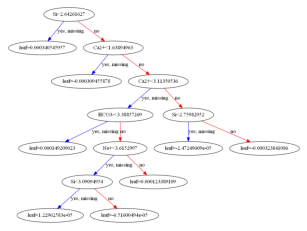

In [20]:
xgb.plot_tree(my_model, num_trees=499)
plt.rcParams['figure.figsize'] = [30, 30]
plt.show();

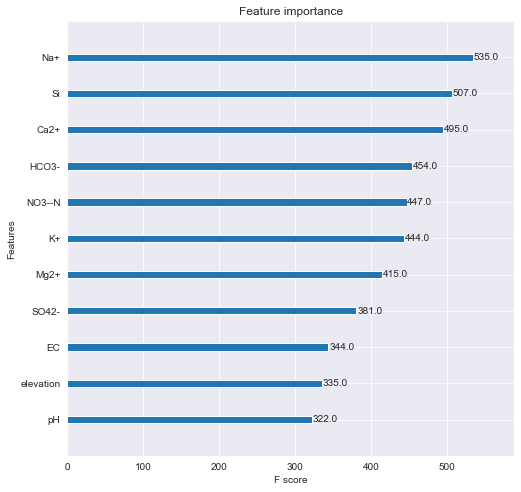

In [22]:
xgb.plot_importance(my_model)
plt.rcParams['figure.figsize'] = [8, 8]
plt.show;

In [22]:
df = pd.DataFrame(y_test)
df = df.reset_index()
df = df.drop('관정명', axis=1)

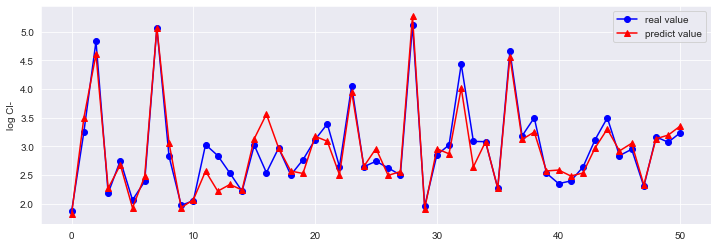

In [23]:
fig = plt.figure( figsize = (12, 4) )
chart = fig.add_subplot(1,1,1)
chart.plot(df[:], marker='o', color='blue', label='real value')
chart.plot(prediction[:], marker='^', color='red', label='predict value')
chart.set_title('')
plt.xlabel('')
plt.ylabel('log Cl-')
plt.legend(loc = 'best');